# WeatherPy

---

## Analysis

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List Using the citipy Library

In [2]:
# Empty list for holding the latitude adn longitude combinations

lat_lngs = []

# Empty list for holding the cities names

cities = []

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a out cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


----

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated

In [3]:
# Set the API base url

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i,city in enumerate(cities):
# for city in cities:
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
        
    # Create endpoint URL with each city
    city_url = query_url + (city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    
    # Run an API request for each of the cities
    try:   
        # Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()
    
        # Parse out latitude,longitude,max temp,humidity,cloudiness, windspeed, country
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City":city,
                         "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date })
    
    # If an error is experienced, skip the city 
    except:
        print("City not found. Skipping...")
        pass        

# Indicate that Data Loading is complete
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuysk
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | waddan
Processing Record 4 of Set 1 | conception bay south
Processing Record 5 of Set 1 | sishilichengzi
City not found. Skipping...
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | nishinoomote
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | port sudan
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | i-n-salah
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | zhangjiakou
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | hovd


Processing Record 33 of Set 4 | port mathurin
Processing Record 34 of Set 4 | cromer
Processing Record 35 of Set 4 | nar'yan-mar
Processing Record 36 of Set 4 | howrah
Processing Record 37 of Set 4 | kununurra
Processing Record 38 of Set 4 | pathein
Processing Record 39 of Set 4 | okha
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | asau
Processing Record 42 of Set 4 | flying fish cove
Processing Record 43 of Set 4 | mukah
City not found. Skipping...
Processing Record 44 of Set 4 | brookings
Processing Record 45 of Set 4 | scarborough
Processing Record 46 of Set 4 | sisimiut
Processing Record 47 of Set 4 | tucuma
Processing Record 48 of Set 4 | vernon
Processing Record 49 of Set 4 | kabompo
Processing Record 0 of Set 5 | akbarabad
Processing Record 1 of Set 5 | polyarnyy
Processing Record 2 of Set 5 | ugoofaaru
Processing Record 3 of Set 5 | newman
Processing Record 4 of Set 5 | mogocha
Processing Record 5 of Set 5 | new norfolk
Processing Record 6 of Set 5 | lom

Processing Record 25 of Set 8 | belozersk
Processing Record 26 of Set 8 | sambaina
Processing Record 27 of Set 8 | port alfred
Processing Record 28 of Set 8 | kamianets-podilskyi
Processing Record 29 of Set 8 | le port
Processing Record 30 of Set 8 | kaa-khem
Processing Record 31 of Set 8 | puerto baquerizo moreno
Processing Record 32 of Set 8 | sinan
Processing Record 33 of Set 8 | ceerigaabo
Processing Record 34 of Set 8 | aginskoye
Processing Record 35 of Set 8 | san antonio de pale
Processing Record 36 of Set 8 | afaahiti
Processing Record 37 of Set 8 | masterton
Processing Record 38 of Set 8 | dara
Processing Record 39 of Set 8 | beneditinos
Processing Record 40 of Set 8 | ljusdal
Processing Record 41 of Set 8 | nobres
Processing Record 42 of Set 8 | barakani
Processing Record 43 of Set 8 | tofol
Processing Record 44 of Set 8 | la passe
Processing Record 45 of Set 8 | kudahuvadhoo
Processing Record 46 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 47 of Set 8 

Processing Record 17 of Set 12 | rongelap
Processing Record 18 of Set 12 | magadan
Processing Record 19 of Set 12 | villa gesell
Processing Record 20 of Set 12 | minas de marcona
Processing Record 21 of Set 12 | illizi
Processing Record 22 of Set 12 | pisco
Processing Record 23 of Set 12 | punta de bombon
Processing Record 24 of Set 12 | valfin-les-saint-claude
Processing Record 25 of Set 12 | thanh hoa
Processing Record 26 of Set 12 | yumbe
Processing Record 27 of Set 12 | port moresby
Processing Record 28 of Set 12 | cidreira
Processing Record 29 of Set 12 | monte caseros
Processing Record 30 of Set 12 | horta
Processing Record 31 of Set 12 | nago
Processing Record 32 of Set 12 | minacu
City not found. Skipping...
Processing Record 33 of Set 12 | duong dong
Processing Record 34 of Set 12 | fortuna
Processing Record 35 of Set 12 | malacacheta
Processing Record 36 of Set 12 | berezovyy
Processing Record 37 of Set 12 | elmina
Processing Record 38 of Set 12 | toliara
Processing Record 39

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuysk,63.7553,121.6247,13.38,57,0,2.53,RU,1691520594
1,bilibino,68.0546,166.4372,4.71,53,100,2.61,RU,1691520595
2,waddan,29.1614,16.1390,29.11,35,0,8.07,LY,1691520595
3,conception bay south,47.4999,-52.9981,16.62,80,100,5.26,CA,1691520595
4,vorgashor,67.5833,63.9500,9.89,77,100,3.90,RU,1691520596


In [6]:
# Export the City_Data into a csv

city_data_df.to_csv("cities.csv",index_label="City_ID")

In [7]:
# Read saved data

city_data_df=pd.read_csv("cities.csv",index_col="City_ID")

# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuysk,63.7553,121.6247,13.38,57,0,2.53,RU,1691520594
1,bilibino,68.0546,166.4372,4.71,53,100,2.61,RU,1691520595
2,waddan,29.1614,16.1390,29.11,35,0,8.07,LY,1691520595
3,conception bay south,47.4999,-52.9981,16.62,80,100,5.26,CA,1691520595
4,vorgashor,67.5833,63.9500,9.89,77,100,3.90,RU,1691520596


### Create the Scatter Plot

In [12]:
# Define a function plot scatter plots:

def plot_scatter(y_axis, ylabel,title):

    plt.scatter(city_data_df["Lat"],y_axis,edgecolor ="black")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"City Max Latitude vs. {title} ({time.strftime('%Y-%m-%d')})")
    plt.grid(True)

#### Latitude vs. Temperature

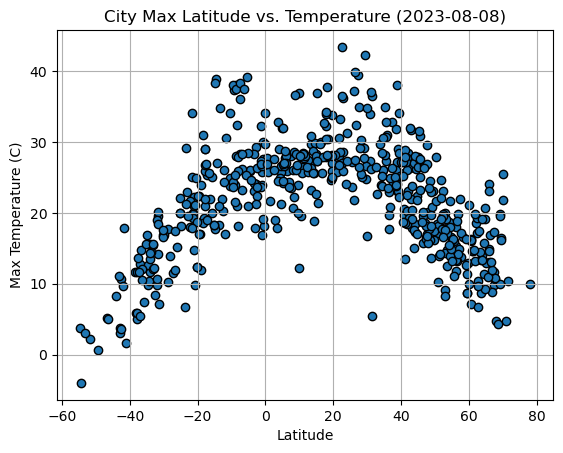

In [14]:
y_axis = city_data_df["Max Temp"]

plot_scatter(y_axis, "Max Temperature (C)","Temperature")
plt.savefig("Fig01.png")
plt.show()

#### Latitude vs. Humidity

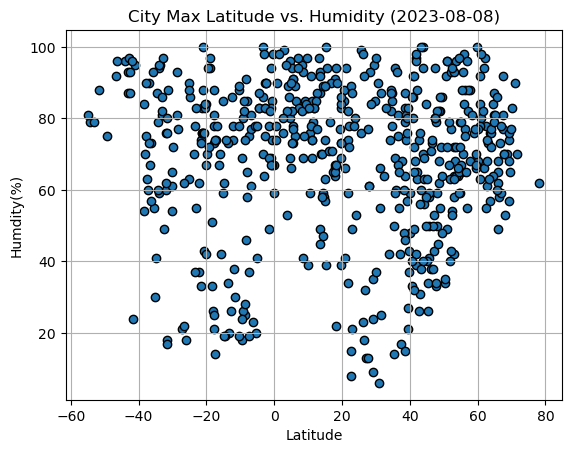

In [15]:
y_axis = city_data_df["Humidity"]

plot_scatter(y_axis, "Humdity(%)","Humidity")
plt.savefig("Fig2.png")
plt.show()

#### Latitude vs. Cloudiness

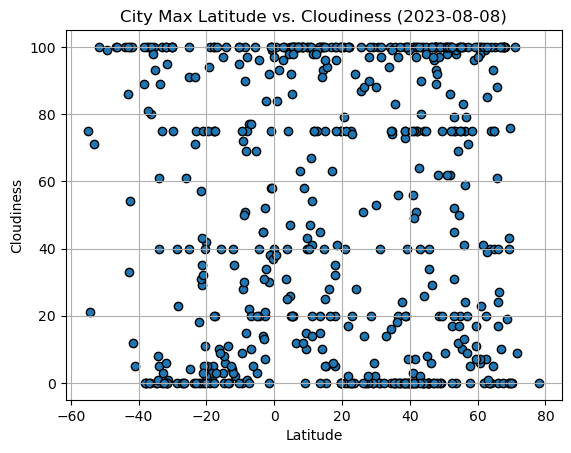

In [17]:
y_axis = city_data_df["Cloudiness"]

plot_scatter(y_axis, "Cloudiness","Cloudiness")
plt.savefig("Fig3.png")
plt.show()

#### Latitude vs. Wind Speed

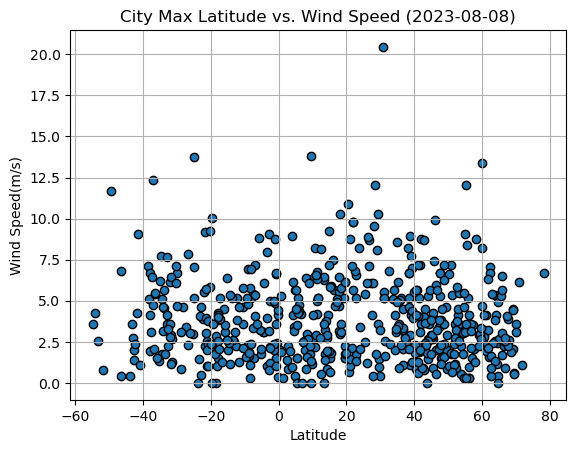

In [18]:
y_axis=city_data_df["Wind Speed"]

plot_scatter(y_axis, "Wind Speed(m/s)", "Wind Speed")
plt.savefig("Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuysk,63.7553,121.6247,13.38,57,0,2.53,RU,1691520594
1,bilibino,68.0546,166.4372,4.71,53,100,2.61,RU,1691520595
2,waddan,29.1614,16.1390,29.11,35,0,8.07,LY,1691520595
3,conception bay south,47.4999,-52.9981,16.62,80,100,5.26,CA,1691520595
4,vorgashor,67.5833,63.9500,9.89,77,100,3.90,RU,1691520596


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df=city_data_df[city_data_df["Lat"] < 0]

# Display sample data

southern_hemi_df.head()                      

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,port-aux-francais,-49.3500,70.2167,0.59,75,99,11.67,TF,1691520596
7,papatowai,-46.5619,169.4708,5.23,92,100,6.82,NZ,1691520596
9,edinburgh of the seven seas,-37.0676,-12.3116,12.84,90,100,12.38,SH,1691520597
11,blackmans bay,-43.0167,147.3167,3.07,93,86,2.72,AU,1691520598
15,puerto natales,-51.7236,-72.4875,2.24,88,100,0.76,CL,1691520599


In [23]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_axis, y_axis, ylabel, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    print(f"The r-value is : {rvalue**2}.")
    plt.show()
    

### Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.4392887723749895.


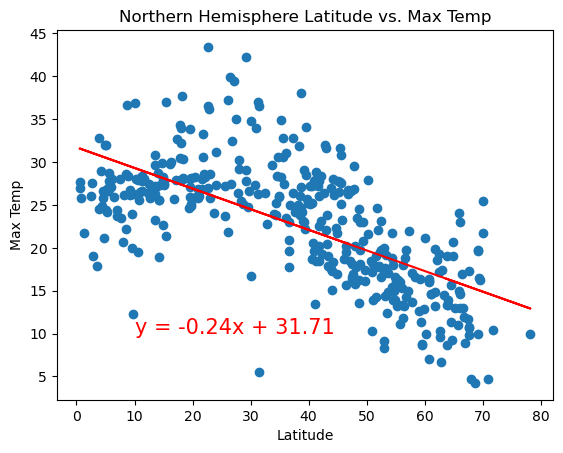

In [24]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

plot_linear_regression(x_axis,y_axis,"Max Temp","Northern Hemisphere Latitude vs. Max Temp",(10,10))



The r-value is : 0.618299656896811.


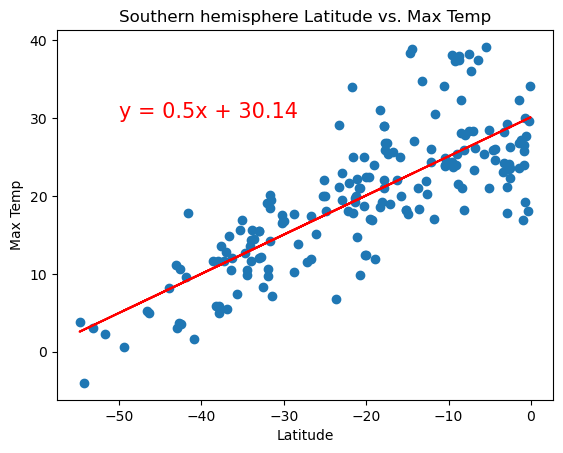

In [25]:
# Southern hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Max Temp"]

plot_linear_regression(x_axis,y_axis,'Max Temp',"Southern hemisphere Latitude vs. Max Temp",(-50,30))

**Discussion about the linear relationship:**<br> **_Northern hemisphere_**:  the value of the correlation coefficient is closer to 0 indicating a weak correlation between the latitude and humidity and a negative slope value further implies a negative correlation between the two.<br>
**_Southern hemisphere_**: the coefficient correlation is nearer to  0 which implies a low correlation and the negative value of the slope of x(latitude) implies a negative correlation between temperature and humidity in the southern hemisphere, as one increases the other decreases.

### Humidity vs. Latitude Linear Regreesion Plot

The r-value is : 0.008096670627364223.


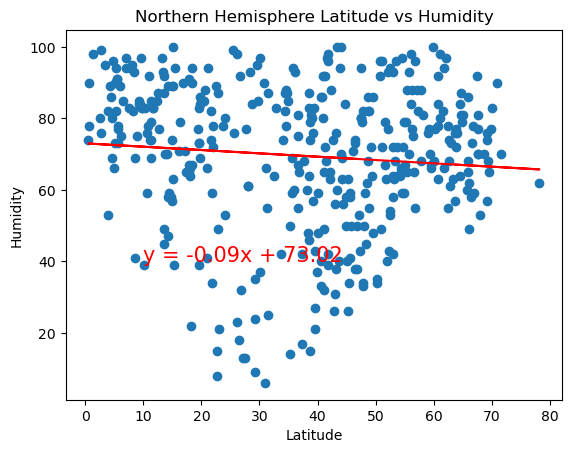

In [26]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Humidity"]

plot_linear_regression(x_axis,y_axis,"Humidity","Northern Hemisphere Latitude vs Humidity",(10,40))

The r-value is : 0.017919159347115122.


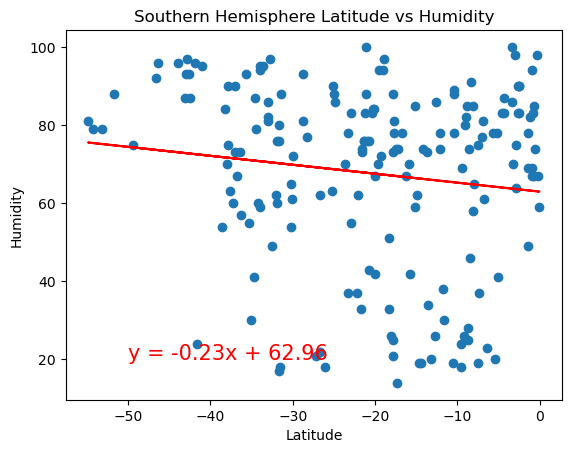

In [27]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Humidity"]

plot_linear_regression(x_axis,y_axis,"Humidity","Southern Hemisphere Latitude vs Humidity",(-50,20))

**Discussion about the linear relationship:**<br> **_Northern hemisphere_**:  the value of the correlation coefficient is closer to 0 indicating a weak correlation between the latitude and humidity and a negative slope value further implies a negative correlation between the two.<br>
**_Southern hemisphere_**: the coefficient correlation is nearer to  0 which implies a low correlation and the negative value of the slope of x(latitude) implies a negative correlation between temperature and humidity in the southern hemisphere, as one increases the other decreases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.004959227873516134.


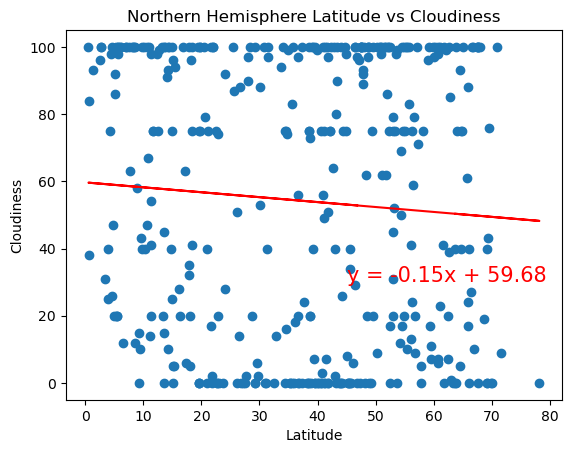

In [28]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Cloudiness"]

plot_linear_regression(x_axis,y_axis,"Cloudiness","Northern Hemisphere Latitude vs Cloudiness",(45,30))

The r-value is : 0.011931841757545409.


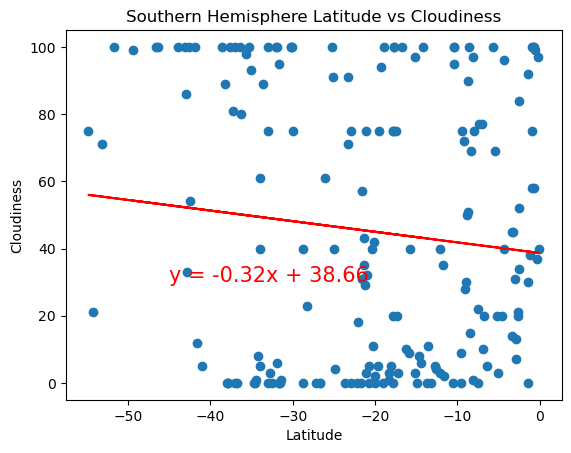

In [29]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Cloudiness"]

plot_linear_regression(x_axis,y_axis,"Cloudiness","Southern Hemisphere Latitude vs Cloudiness",(-45,30))

**Discussion about the linear relationship:**<br>  **_Northern hemisphere_**: the r-value for cloudiness vs latitude is low and the value of the slope of latitude is negative so we can say that there is a weak correlation between the two.<br>
**_Southern hemisphere_**: The correlation coefficient is low indicating a weak correlation, this is further implied by a low slope value of latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.008870295317200225.


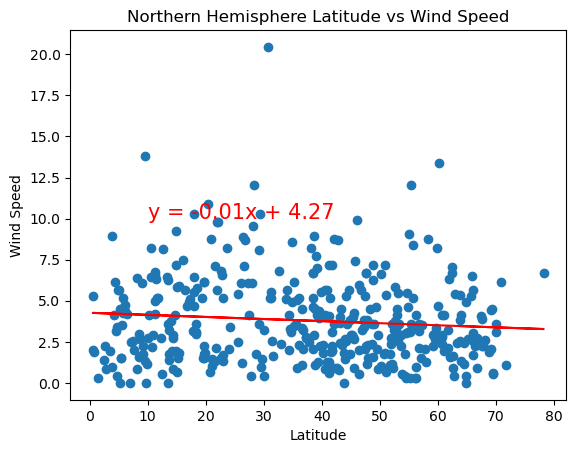

In [30]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Wind Speed"]

plot_linear_regression(x_axis,y_axis,"Wind Speed","Northern Hemisphere Latitude vs Wind Speed",(10,10))

The r-value is : 0.007231840722775744.


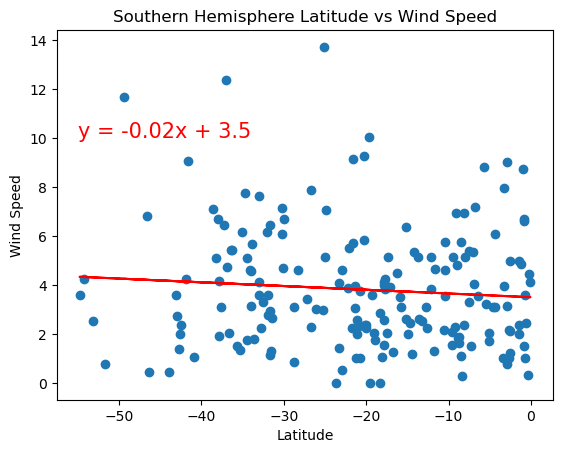

In [31]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Wind Speed"]

plot_linear_regression(x_axis,y_axis,"Wind Speed","Southern Hemisphere Latitude vs Wind Speed",(-55,10))

**Discussion about the linear relationship:**<br> 
_**Northern hemisphere**_ : The correlation coefficient value is closer to 0 than 1, implying a weak relationship between wind speed and latitude, the slope value is also low which means when one decreases the other decreases as well.<br>
_**Southern hemisphere**_: the squared correlation coefficient value is low and the slope is low as well, concluding a weak and negative correlation between the two.